In [1]:
from joblib import load
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from os import listdir

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from pydlts.fsmodels import SklMultiExpFrequencyScan

from pydlts.fsplots import plot_model

%matplotlib inline

In [2]:
DATASETS_PATH = '../../../datasets/'
PLOTS_PATH = '../../../plots/'
MODELS_PATH = 'saved_models/'

In [3]:
file_names = listdir(DATASETS_PATH)

In [4]:
u1 = -4
ur = -5

data_frames = [[file_name, pd.read_csv(DATASETS_PATH + file_name, parse_dates=[0])] for file_name in file_names]

condition = lambda frame: frame.loc[0, 'u1']==u1 and frame.loc[0, 'ur']==ur
data_frames = [[name, frame] for [name, frame] in data_frames if condition(frame)]

In [5]:
key_func = lambda x: x[1].temperature_k.iloc[0]
data_frames.sort(key=key_func)

for i, item in enumerate(data_frames):
    print(f'{i}.', item[0])

0. 1564ЛЕ1№1_п1_2500Гц-1Гц_1пФ_-10С_-4В-5В_10мВ_10мкс_шаг_0,01.csv
1. 1564ЛЕ1№1_п1_2500Гц-1Гц_1пФ_+10С_-4В-5В_50мВ_10мкс_шаг_0,01.csv
2. 1564ЛЕ1№1_п1_2500Гц-1Гц_10пФ_+30С_-4В-5В_50мВ_10мкс_шаг_0,1.csv


In [6]:
def get_X_y(dataset):
    filling_pulse = dataset.f_pulse[0] * 10 ** -6
    
    df = dataset.sample(frac=1, random_state=42)
    
    X_train = np.log10(df.frequency_hz.to_numpy())
    y_train = df.dlts_pf.to_numpy()
    
    return filling_pulse, X_train, y_train

Загружаем модель для 263 К

In [7]:
filling_pulse, X_train, y_train = get_X_y(data_frames[0][1])
mean_temp_263 = data_frames[0][1].temperature_k.mean()

In [8]:
f_name = MODELS_PATH + '1564ЛЕ1№1_п1_2500Гц-1Гц_1пФ_-10С_-4В-5В_10мВ_10мкс_шаг_0,01_multiexp_grid_search.pkl'
grid_search_263 = load(f_name)
model_263K = grid_search_263.best_estimator_

2022-10-14 15:41:01.163402: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2022-10-14 15:41:01.163506: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: aleksei-MS-7C80
2022-10-14 15:41:01.163529: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: aleksei-MS-7C80
2022-10-14 15:41:01.163834: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 515.76.0
2022-10-14 15:41:01.163905: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 515.65.1
2022-10-14 15:41:01.163925: E tensorflow/stream_executor/cuda/cuda_diagnostics.cc:313] kernel version 515.65.1 does not match DSO version 515.76.0 -- cannot find working devices in this configuration
2022-10-14 15:41:01.165339: I tensorflow/core/platform/cpu_feature_guard.cc:193] T

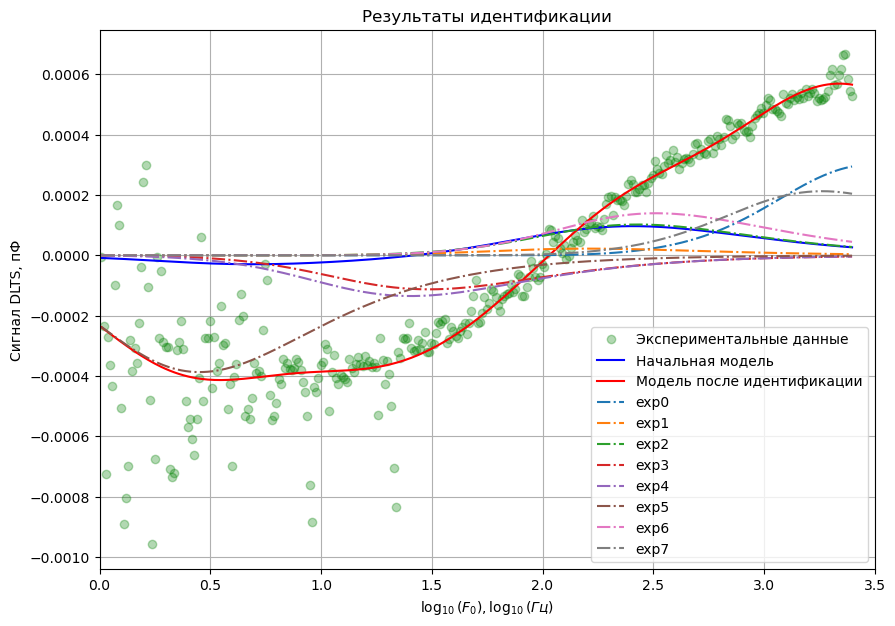

In [9]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, model_263K.fit_results_)
ax.set_ylabel('Сигнал DLTS, пФ')
plt.show()

In [10]:
params_263 = np.stack([model_263K.exps_params_[:, 1], 
                       np.repeat(mean_temp_263, model_263K.exps_params_.shape[0])], 
                      axis=-1)

params_263 = params_263[np.argsort(params_263[:,0]), :]

params_263

array([[-3.86925772e-04,  2.62932356e+02],
       [-1.35011812e-04,  2.62932356e+02],
       [-1.12769316e-04,  2.62932356e+02],
       [ 2.21842147e-05,  2.62932356e+02],
       [ 1.02082370e-04,  2.62932356e+02],
       [ 1.39439978e-04,  2.62932356e+02],
       [ 2.12529898e-04,  2.62932356e+02],
       [ 3.00863367e-04,  2.62932356e+02]])

Загружаем модель для 283 К

In [11]:
filling_pulse, X_train, y_train = get_X_y(data_frames[1][1])
mean_temp_283 = data_frames[1][1].temperature_k.mean()

In [12]:
f_name = MODELS_PATH + '1564ЛЕ1№1_п1_2500Гц-1Гц_1пФ_+10С_-4В-5В_50мВ_10мкс_шаг_0,01_multiexp_grid_search.pkl'
grid_search_283 = load(f_name)
model_283K = grid_search_283.best_estimator_

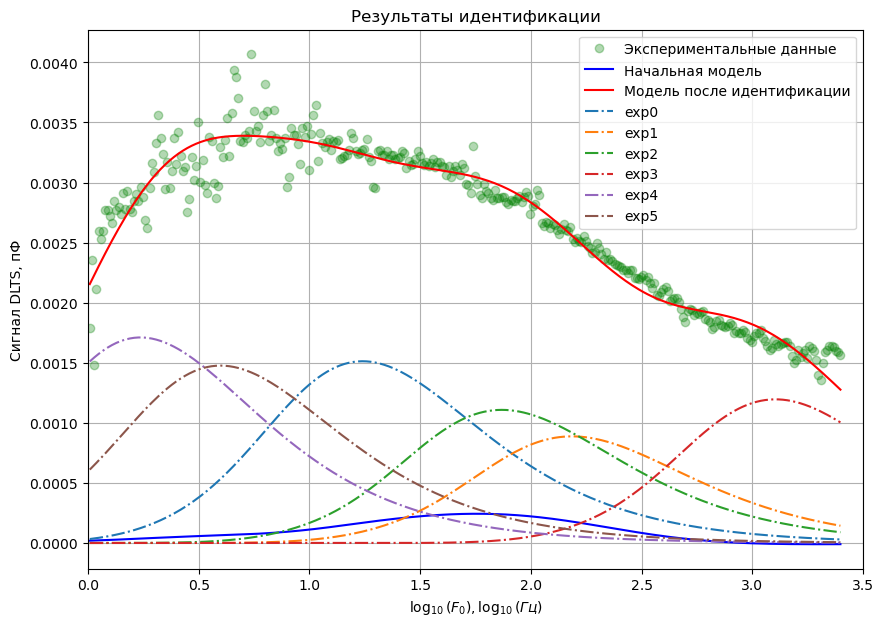

In [13]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, model_283K.fit_results_)
ax.set_ylabel('Сигнал DLTS, пФ')
plt.show()

In [14]:
params_283 = np.stack([model_283K.exps_params_[:, 1], 
                       np.repeat(mean_temp_283, model_283K.exps_params_.shape[0])], 
                      axis=-1)

params_283 = params_283[np.argsort(params_283[:,0]), :]

params_283

array([[8.87480860e-04, 2.83188647e+02],
       [1.10799540e-03, 2.83188647e+02],
       [1.19565100e-03, 2.83188647e+02],
       [1.47632397e-03, 2.83188647e+02],
       [1.51271755e-03, 2.83188647e+02],
       [1.71088427e-03, 2.83188647e+02]])

Загружаем модель для 283 К

In [15]:
filling_pulse, X_train, y_train = get_X_y(data_frames[2][1])
mean_temp_303 = data_frames[2][1].temperature_k.mean()

In [16]:
f_name = MODELS_PATH + '1564ЛЕ1№1_п1_2500Гц-1Гц_10пФ_+30С_-4В-5В_50мВ_10мкс_шаг_0,1_multiexp_grid_search.pkl'
grid_search_303 = load(f_name)
model_303K = grid_search_303.best_estimator_

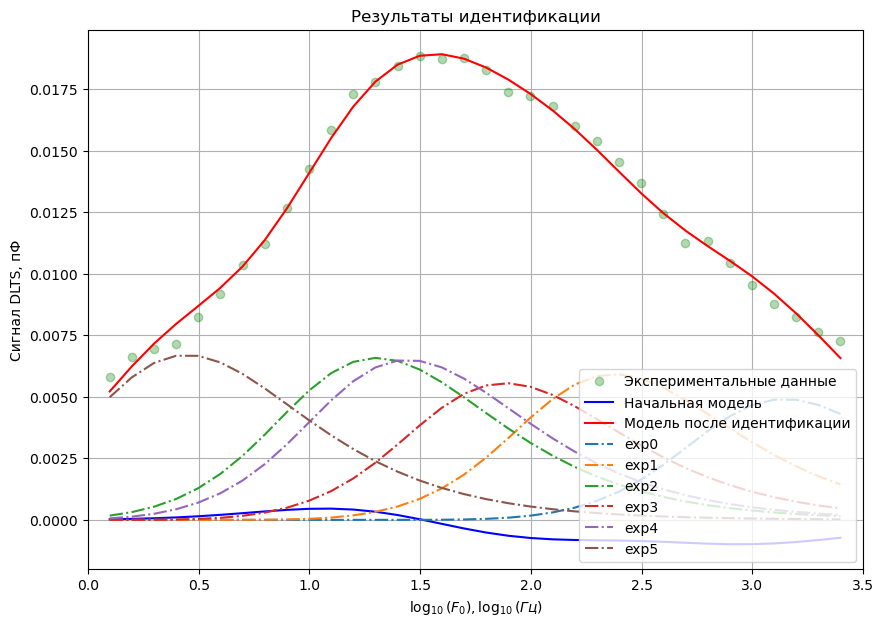

In [17]:
fig, ax = plot_model(X_train, y_train, SklMultiExpFrequencyScan, model_303K.fit_results_)
ax.set_ylabel('Сигнал DLTS, пФ')
plt.legend(loc='lower right')
plt.show()

In [18]:
params_303 = np.stack([model_303K.exps_params_[:, 1], 
                       np.repeat(mean_temp_303, model_303K.exps_params_.shape[0])], 
                      axis=-1)

params_303 = params_303[np.argsort(params_303[:,0]), :]

params_303

array([[4.91205519e-03, 3.03271706e+02],
       [5.55595972e-03, 3.03271706e+02],
       [5.92423401e-03, 3.03271706e+02],
       [6.50431245e-03, 3.03271706e+02],
       [6.58568176e-03, 3.03271706e+02],
       [6.70552765e-03, 3.03271706e+02]])

Переход к координатам Аррениуса

$e_n = BT^2\exp(\frac{-\Delta E}{kT})$

$\ln(e_n) = \ln(BT^2) + \frac{-\Delta E}{kT}$

In [19]:
arrhenius_params = np.r_[params_263, params_283, params_303]

arrhenius_params[:, 0] = np.power(10, arrhenius_params[:, 0])
arrhenius_params[:, 0] = np.log(1 / ( arrhenius_params[:, 0] * np.power(arrhenius_params[:, 1], 2) ))

arrhenius_params[:, 1] = 1000 / arrhenius_params[:, 1]

arrhenius_params

array([[-11.14290266,   3.80325957],
       [-11.14348272,   3.80325957],
       [-11.14353393,   3.80325957],
       [-11.14384468,   3.80325957],
       [-11.14402865,   3.80325957],
       [-11.14411467,   3.80325957],
       [-11.14428296,   3.80325957],
       [-11.14448636,   3.80325957],
       [-11.29427005,   3.53121501],
       [-11.2947778 ,   3.53121501],
       [-11.29497963,   3.53121501],
       [-11.29562591,   3.53121501],
       [-11.29570971,   3.53121501],
       [-11.296166  ,   3.53121501],
       [-11.44056867,   3.29737322],
       [-11.44205132,   3.29737322],
       [-11.4428993 ,   3.29737322],
       [-11.44423498,   3.29737322],
       [-11.44442234,   3.29737322],
       [-11.44469829,   3.29737322]])

In [20]:
arrhenius_params_mins = arrhenius_params[[0, 8, 14],:]
arrhenius_params_maxes = arrhenius_params[[7, 13, 19],:]

Сделаем линейную регрессию минимумов

In [21]:
x = np.linspace(3, 4, 100).reshape(-1, 1)

In [22]:
lin_regr_mins = LinearRegression()
lin_regr_mins.fit(X=arrhenius_params_mins[:, 1].reshape(-1, 1), y=arrhenius_params_mins[:, 0].reshape(-1, 1))
lin_regr_mins_pred = lin_regr_mins.predict(x)

Сделаем линейную регрессию максимумов

In [23]:
lin_regr_maxes = LinearRegression()
lin_regr_maxes.fit(X=arrhenius_params_maxes[:, 1].reshape(-1, 1), y=arrhenius_params_maxes[:, 0].reshape(-1, 1))
lin_regr_maxes_pred = lin_regr_maxes.predict(x)

Сделаем линейную регрессию по всем точкам

In [24]:
lin_regr_all = LinearRegression()
lin_regr_all.fit(X=arrhenius_params[:, 1].reshape(-1, 1), y=arrhenius_params[:, 0].reshape(-1, 1))
lin_regr_all_pred = lin_regr_all.predict(x)

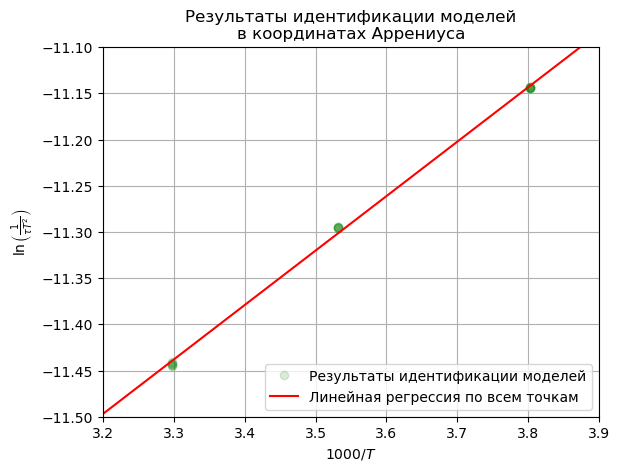

In [25]:
plt.plot(arrhenius_params[:,1], 
         arrhenius_params[:,0], 
         'og', 
         alpha=0.15, 
         label='Результаты идентификации моделей')

plt.plot(x, 
         lin_regr_all_pred,
         '-r',
         label='Линейная регрессия по всем точкам')

plt.title('Результаты идентификации моделей\nв координатах Аррениуса')
plt.xlabel(r'$1000/T$')
plt.ylabel(r'$\ln\left(\frac{1}{\tau T^2}\right)$')

plt.xlim([3.2, 3.9])
plt.ylim([-11.5, -11.1])
plt.legend(loc='lower right')
plt.grid()

plt.show()

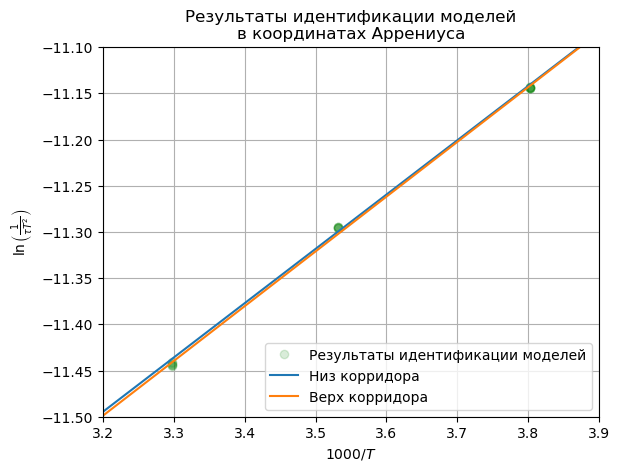

In [26]:
plt.plot(arrhenius_params[:,1], 
         arrhenius_params[:,0], 
         'og', 
         alpha=0.15, 
         label='Результаты идентификации моделей')

plt.plot(x, 
         lin_regr_mins_pred,
         '-', alpha = 1,
         label='Низ корридора')

plt.plot(x, 
         lin_regr_maxes_pred,
         '-', alpha = 1,
         label='Верх корридора')

plt.title('Результаты идентификации моделей\nв координатах Аррениуса')
plt.xlabel(r'$1000/T$')
plt.ylabel(r'$\ln\left(\frac{1}{\tau T^2}\right)$')

plt.xlim([3.2, 3.9])
plt.ylim([-11.5, -11.1])
plt.legend(loc='lower right')
plt.grid()

plt.show()

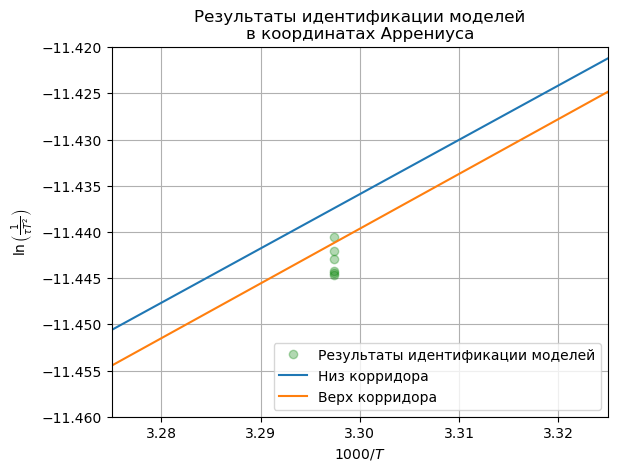

In [27]:
plt.plot(arrhenius_params[:,1], 
         arrhenius_params[:,0], 
         'og', 
         alpha=0.3, 
         label='Результаты идентификации моделей')

plt.plot(x, 
         lin_regr_mins_pred,
         '-', alpha = 1,
         label='Низ корридора')

plt.plot(x, 
         lin_regr_maxes_pred,
         '-', alpha = 1,
         label='Верх корридора')

plt.title('Результаты идентификации моделей\nв координатах Аррениуса')
plt.xlabel(r'$1000/T$')
plt.ylabel(r'$\ln\left(\frac{1}{\tau T^2}\right)$')

plt.xlim([3.275, 3.325])
plt.ylim([-11.46, -11.42])
plt.legend(loc='lower right')
plt.grid()

plt.show()

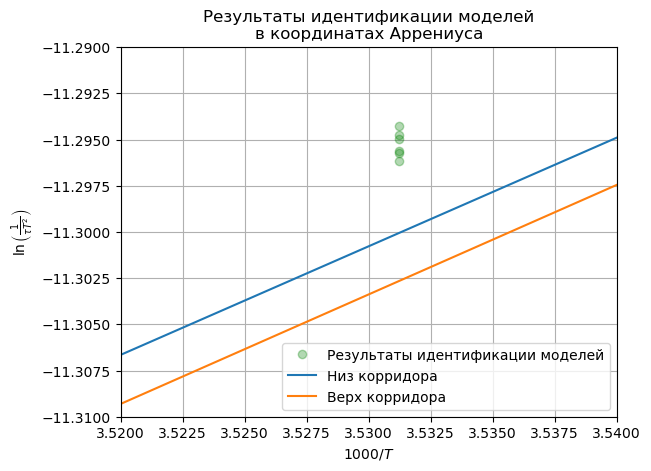

In [28]:
plt.plot(arrhenius_params[:,1], 
         arrhenius_params[:,0], 
         'og', 
         alpha=0.3, 
         label='Результаты идентификации моделей')

plt.plot(x, 
         lin_regr_mins_pred,
         '-', alpha = 1,
         label='Низ корридора')

plt.plot(x, 
         lin_regr_maxes_pred,
         '-', alpha = 1,
         label='Верх корридора')

plt.title('Результаты идентификации моделей\nв координатах Аррениуса')
plt.xlabel(r'$1000/T$')
plt.ylabel(r'$\ln\left(\frac{1}{\tau T^2}\right)$')

plt.xlim([3.52, 3.54])
plt.ylim([-11.31, -11.29])
plt.legend(loc='lower right')
plt.grid()

plt.show()

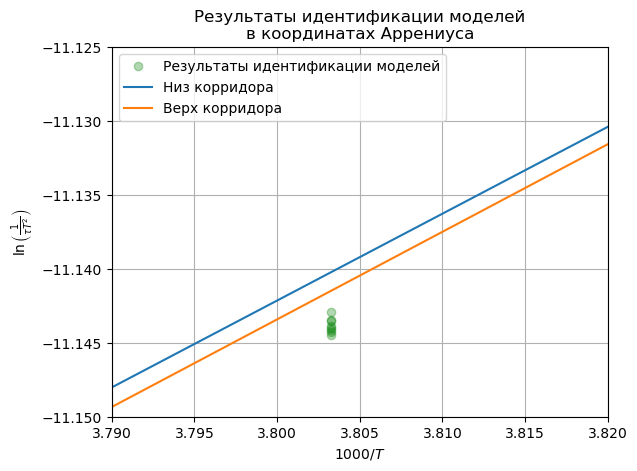

In [29]:
plt.plot(arrhenius_params[:,1], 
         arrhenius_params[:,0], 
         'og', 
         alpha=0.3, 
         label='Результаты идентификации моделей')

plt.plot(x, 
         lin_regr_mins_pred,
         '-', alpha = 1,
         label='Низ корридора')

plt.plot(x, 
         lin_regr_maxes_pred,
         '-', alpha = 1,
         label='Верх корридора')

plt.title('Результаты идентификации моделей\nв координатах Аррениуса')
plt.xlabel(r'$1000/T$')
plt.ylabel(r'$\ln\left(\frac{1}{\tau T^2}\right)$')

plt.xlim([3.79, 3.82])
plt.ylim([-11.150, -11.125])
plt.legend(loc='upper left')
plt.grid()

plt.show()

Выведем коэффициенты линейных регрессий

In [30]:
lin_regr_mins.coef_, lin_regr_mins.intercept_

(array([[0.58754024]]), array([-13.37479325]))

In [31]:
lin_regr_maxes.coef_, lin_regr_maxes.intercept_

(array([[0.59246788]]), array([-13.39479298]))

In [32]:
lin_regr_all.coef_, lin_regr_all.intercept_

(array([[0.58917187]]), array([-13.38232708]))

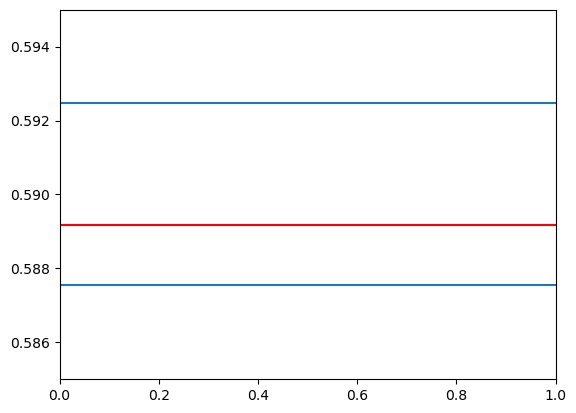

In [33]:
plt.axhline(lin_regr_mins.coef_)
plt.axhline(lin_regr_maxes.coef_)
plt.axhline(lin_regr_all.coef_, color='r')
plt.ylim([0.585, 0.595])
plt.show()

Полиномиальная регрессия минимумов и максимумов

In [34]:
n = 2
poly_regr = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=n, include_bias=False)),
    ('scaler', StandardScaler()),
    ('linear_regresstion', LinearRegression()),
])

Регрессия полиномом по минимумам

In [35]:
poly_regr.fit(X=arrhenius_params_mins[:, 1].reshape(-1, 1), y=arrhenius_params_mins[:, 0].reshape(-1, 1))
poly_regr_mins_pred = poly_regr.predict(x)

Регрессия полиномом по максимумам

In [36]:
poly_regr.fit(X=arrhenius_params_maxes[:, 1].reshape(-1, 1), y=arrhenius_params_maxes[:, 0].reshape(-1, 1))
poly_regr_maxes_pred = poly_regr.predict(x)

Регрессия полиномом по всем точкам

In [37]:
poly_regr.fit(X=arrhenius_params[:, 1].reshape(-1, 1), y=arrhenius_params[:, 0].reshape(-1, 1))
poly_regr_all_pred = poly_regr.predict(x)

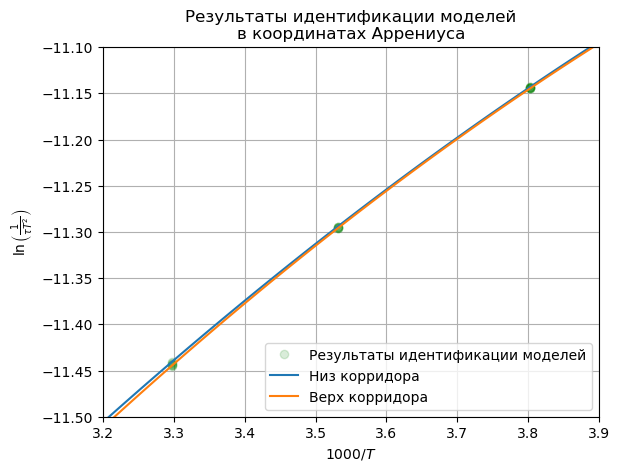

In [38]:
plt.plot(arrhenius_params[:,1], 
         arrhenius_params[:,0], 
         'og', 
         alpha=0.15, 
         label='Результаты идентификации моделей')



plt.plot(x, poly_regr_mins_pred, '-', alpha = 1, label='Низ корридора')

plt.plot(x, poly_regr_maxes_pred, '-', alpha = 1, label='Верх корридора')

# plt.plot(x, poly_regr_all_pred, '-r', label='Полиномиальная регрессия по всем точкам')

plt.title('Результаты идентификации моделей\nв координатах Аррениуса')
plt.xlabel(r'$1000/T$')
plt.ylabel(r'$\ln\left(\frac{1}{\tau T^2}\right)$')

plt.xlim([3.2, 3.9])
plt.ylim([-11.5, -11.1])
plt.legend(loc='lower right')
plt.grid()

plt.show()

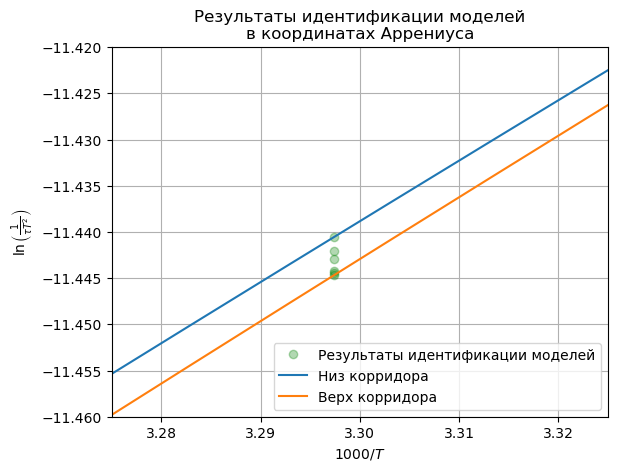

In [39]:
plt.plot(arrhenius_params[:,1], 
         arrhenius_params[:,0], 
         'og', 
         alpha=0.3, 
         label='Результаты идентификации моделей')



plt.plot(x, poly_regr_mins_pred, '-', alpha = 1, label='Низ корридора')

plt.plot(x, poly_regr_maxes_pred, '-', alpha = 1, label='Верх корридора')

# plt.plot(x, poly_regr_all_pred, '-r', label='Полиномиальная регрессия по всем точкам')

plt.title('Результаты идентификации моделей\nв координатах Аррениуса')
plt.xlabel(r'$1000/T$')
plt.ylabel(r'$\ln\left(\frac{1}{\tau T^2}\right)$')

plt.xlim([3.275, 3.325])
plt.ylim([-11.46, -11.42])
plt.legend(loc='lower right')
plt.grid()

plt.show()

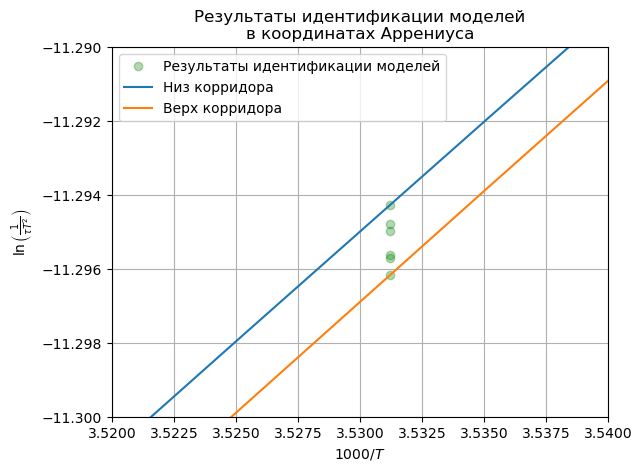

In [40]:
plt.plot(arrhenius_params[:,1], 
         arrhenius_params[:,0], 
         'og', 
         alpha=0.3, 
         label='Результаты идентификации моделей')



plt.plot(x, poly_regr_mins_pred, '-', alpha = 1, label='Низ корридора')

plt.plot(x, poly_regr_maxes_pred, '-', alpha = 1, label='Верх корридора')

# plt.plot(x, poly_regr_all_pred, '-r', label='Полиномиальная регрессия по всем точкам')

plt.title('Результаты идентификации моделей\nв координатах Аррениуса')
plt.xlabel(r'$1000/T$')
plt.ylabel(r'$\ln\left(\frac{1}{\tau T^2}\right)$')

plt.xlim([3.52, 3.54])
plt.ylim([-11.30, -11.29])
plt.legend(loc='upper left')
plt.grid()

plt.show()

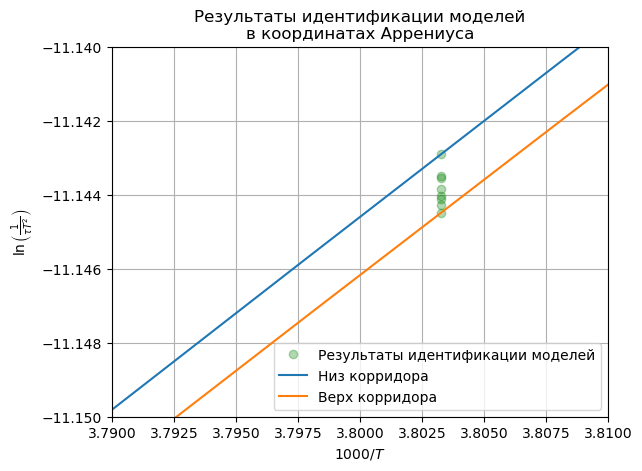

In [41]:
plt.plot(arrhenius_params[:,1], 
         arrhenius_params[:,0], 
         'og', 
         alpha=0.3, 
         label='Результаты идентификации моделей')



plt.plot(x, poly_regr_mins_pred, '-', alpha = 1, label='Низ корридора')

plt.plot(x, poly_regr_maxes_pred, '-', alpha = 1, label='Верх корридора')

# plt.plot(x, poly_regr_all_pred, '-r', label='Полиномиальная регрессия по всем точкам')

plt.title('Результаты идентификации моделей\nв координатах Аррениуса')
plt.xlabel(r'$1000/T$')
plt.ylabel(r'$\ln\left(\frac{1}{\tau T^2}\right)$')

plt.xlim([3.79, 3.81])
plt.ylim([-11.15, -11.14])
plt.legend(loc='lower right')
plt.grid()

plt.show()